In [85]:
# Импорты и настройки
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime

In [47]:
df = pd.read_csv('hh_vacancies.csv') #загрузка файла

In [48]:
df.shape

(398, 14)

In [61]:
# === Этап 1: Предобработка данных ===

data = df.copy()

# published_at -> datetime
data['published_at'] = pd.to_datetime(data['published_at'])

In [62]:
# Объединяем salary_from и salary_to в salary_avg (среднее если оба есть, иначе заполнить одним из них)
df['salary_avg'] = df['salary_from'] + df['salary_to']

In [63]:
# Удаляем строки без зарплаты (и salary_from и salary_to пустые)
df = data[~df['salary_avg'].isna()].copy()

In [64]:
# Очистка experience: приводим к числу лет, если есть значения вроде "3 года", "5 лет", "без опыта", "1-3 года"
df['experience'] = (
    df['experience']
    .str.replace(r'[^0-9\.-]', '', regex=True)  # оставить только цифры, минус и точку
    .astype(float)
)

In [65]:
# Извлечь год и месяц публикации
data['published_year'] = data['published_at'].dt.year
data['published_month'] = data['published_at'].dt.to_period('M').astype(str)

In [66]:
# Признак is_remote из work_conditions
data['is_remote'] = data['work_conditions'].fillna('').str.lower().str.contains('удал') | data['work_conditions'].fillna('').str.lower().str.contains('remote')


In [30]:
df

,vacancy_id,title,company,salary_from,salary_to,currency,city,experience,employment_type,work_conditions,description,published_at,url,scraped_at,salary_avg
38,120873137,Педагог дошкольного образования,ТОО ТАМОС КИДЗ,380000.0,380000.0,KZT,Алматы,36.0,Полная занятость,удаленная работа сменный график гибкий график ...,Обязанности Контроль прогресса обучения каждог...,2025-05-26T00:00:00,https://astana.hh.kz/vacancy/120873137?hhtmFro...,2025-05-31T02:33:43.877174,760000.0
50,121094868,Администратор,ТОО LuxEst,450000.0,450000.0,KZT,Алматы,NaN,Полная занятость,удаленная работа сменный график гибкий график ...,Центр эстетической стоматологии Lux Est ищет о...,2025-05-28T00:00:00,https://hh.kz/vacancy/121094868?hhtmFrom=vacan...,2025-05-31T02:34:46.690212,900000.0
84,121159521,Администратор пункта выдачи,Teez,215000.0,215000.0,KZT,Алматы,NaN,Полная занятость,удаленная работа сменный график гибкий график ...,"Teez маркетплейс, созданный в Казахстане. Мы ...",2025-05-30T00:00:00,https://hh.kz/vacancy/121159521?hhtmFrom=vacan...,2025-05-31T02:36:54.934938,430000.0
101,120677510,Координатор отдела продаж,"Galanz Bottlers, АО",320000.0,320000.0,KZT,Алматы,NaN,Полная занятость,удаленная работа сменный график гибкий график ...,Обязанности документировать процесс выполнения...,2025-05-26T00:00:00,https://hh.kz/vacancy/120677510?hhtmFrom=vacan...,2025-05-31T02:38:16.976805,640000.0
105,121167985,Помощникассистент руководителя,ИП Demvy Academy,350000.0,350000.0,KZT,Астана,NaN,Полная занятость,удаленная работа сменный график гибкий график ...,Нужна ассистентка по работе над IT-сервисом re...,2025-05-30T00:00:00,https://hh.kz/vacancy/121167985?hhtmFrom=vacan...,2025-05-31T02:38:32.078835,700000.0
108,121153171,Юрист,ТОО Астык Логистик,800000.0,800000.0,KZT,Астана,36.0,Полная занятость,удаленная работа сменный график гибкий график ...,Обязанности осуществлять работу по разработке ...,2025-05-30T00:00:00,https://hh.kz/vacancy/121153171?hhtmFrom=vacan...,2025-05-31T02:38:43.591175,1600000.0
113,121150289,Персональный водитель руководителя,ТОО ASTANA MOTOR ASTANA (Тойота Центр Астана М...,420000.0,420000.0,KZT,Астана,36.0,Полная занятость,удаленная работа сменный график гибкий график ...,Обязанности Обеспечивает своевременную подачу ...,2025-05-30T00:00:00,https://hh.kz/vacancy/121150289?hhtmFrom=vacan...,2025-05-31T02:39:02.803453,840000.0
116,121151462,Специалист службы поддержки клиентов,ТОО Hyundai Premium Astana,520000.0,520000.0,KZT,Алматы,NaN,Полная занятость,удаленная работа сменный график гибкий график ...,"Обязанности Принимает и обрабатывает жалобы, п...",2025-05-30T00:00:00,https://hh.kz/vacancy/121151462?hhtmFrom=vacan...,2025-05-31T02:39:14.140199,1040000.0
144,121110114,Полетный диспетчер (Flight dispatcher),РГП НА ПХВ Государственная авиакомпания Беркут...,516000.0,516000.0,KZT,Астана,NaN,Полная занятость,удаленная работа сменный график гибкий график ...,Обязанности подготавливает предварительные рас...,2025-05-29T00:00:00,https://hh.kz/vacancy/121110114?hhtmFrom=vacan...,2025-05-31T02:41:02.799577,1032000.0
158,121172213,Администратор торгового зала,ТОО Hyundai Premium Astana,420000.0,420000.0,KZT,Астана,NaN,Полная занятость,удаленная работа сменный график гибкий график ...,Обязанности встречает и сопровождает клиентов ...,2025-05-30T00:00:00,https://hh.kz/vacancy/121172213?hhtmFrom=vacan...,2025-05-31T02:42:14.154797,840000.0


In [67]:
# === Этап 2: EDA ===


# В каких городах больше всего вакансий?
city_counts = data['city'].fillna('unknown').value_counts()

In [68]:
city_counts

Алматы      269
Астана      123
Менеджер      1
Геймер        1
Семей         1
Сборщик       1
Чат           1
Оператор      1
Name: city, dtype: int64

In [69]:
# Топ компаний по кол-ву вакансий
company_counts = data['company'].fillna('unknown').value_counts()

In [71]:
company_counts

AIR ASTANA, АО                                         5
ТОО МФО Credit365 Kazakhstan (Кредит 365 Казахстан)    5
АО Казахтелеком                                        4
ТОО RT GROUP                                           3
ТОО Millennium Astana                                  3
                                                      ..
ИП DINA                                                1
ТОО Казахстанская топливная компания                   1
ТОО ASTANA VISION                                      1
Haileybury Astana School, НАО                          1
ИП Trade Nails                                         1
Name: company, Length: 348, dtype: int64

In [72]:
# Средний уровень зарплат по городам (только города с достаточным числом вакансий)
salary_by_city = df.groupby('city')['salary_avg'].mean().sort_values(ascending=False)

In [40]:
salary_by_city

city
Астана    841200.0
Алматы    653000.0
Name: salary_avg, dtype: float64

In [73]:
# Тип занятости популярность
employment_counts = data['employment_type'].fillna('unknown').value_counts()

In [42]:
employment_counts

Полная занятость    398
Name: employment_type, dtype: int64

In [76]:
# Влияет ли опыт на зарплату? — соберём корреляцию
corr_exp_salary = df[['experience_years','salary_avg']].dropna().corr().loc['experience_years','salary_avg'] if 'experience_years' in df.columns else np.nan
print("Top 10 городов по количеству вакансий:\\n", city_counts.head(10))
print("\\nTop 10 компаний по количеству вакансий:\\n", company_counts.head(10))
print(f"\\nCorrelation experience_years vs salary_avg: {corr_exp_salary:.3f}")

Top 10 городов по количеству вакансий:\n Алматы      269
Астана      123
Менеджер      1
Геймер        1
Семей         1
Сборщик       1
Чат           1
Оператор      1
Name: city, dtype: int64
\nTop 10 компаний по количеству вакансий:\n AIR ASTANA, АО                                                   5
ТОО МФО Credit365 Kazakhstan (Кредит 365 Казахстан)              5
АО Казахтелеком                                                  4
ТОО RT GROUP                                                     3
ТОО Millennium Astana                                            3
ТОО Wolt TechnologiesKazakhstan (Вольт Технолоджис Казахстан)    3
ТОО 35 HEALTH CLUBS KAZAKHSTAN                                   3
Частная компания Automated Communication Solutions Ltd.          3
BI Group                                                         3
ТОО AB Restaurants                                               3
Name: company, dtype: int64
\nCorrelation experience_years vs salary_avg: nan


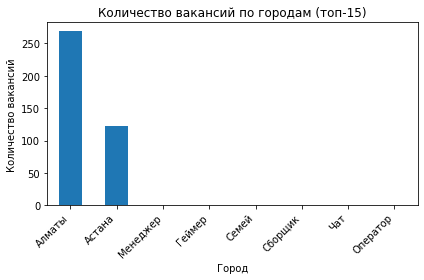

In [78]:
# Графики (matplotlib, без seaborn)

# 1) barplot: количество вакансий по городам (top 15)
top_cities = city_counts.head(15)
plt.figure()
top_cities.plot(kind='bar')
plt.title('Количество вакансий по городам (топ-15)')
plt.xlabel('Город')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



C:\Users\arays\AppData\Local\Temp/ipykernel_15656/2241314279.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


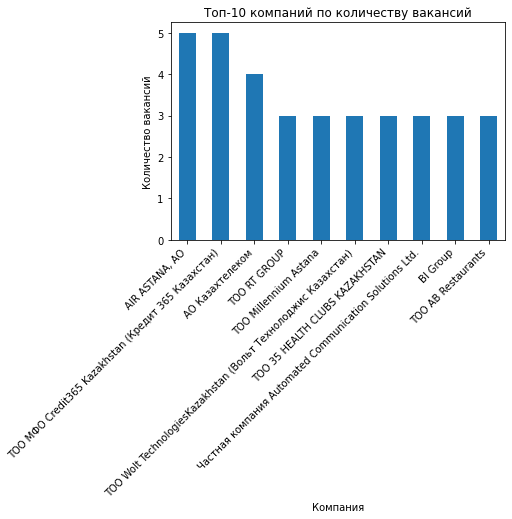

In [79]:
# 2) barplot: топ-10 компаний по количеству вакансий
plt.figure()
company_counts.head(10).plot(kind='bar')
plt.title('Топ-10 компаний по количеству вакансий')
plt.xlabel('Компания')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



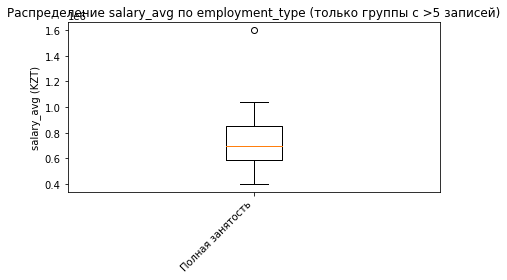

In [80]:
# 3) boxplot: salary_avg по employment_type
plt.figure()
groups = [group['salary_avg'].dropna().values for name, group in data.groupby('employment_type') if len(group)>5]
labels = [name for name, group in data.groupby('employment_type') if len(group)>5]
plt.boxplot(groups, labels=labels, vert=True)
plt.title('Распределение salary_avg по employment_type (только группы с >5 записей)')
plt.ylabel('salary_avg (KZT)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



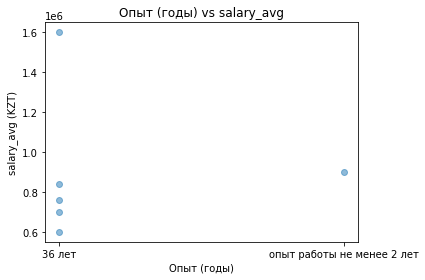

In [84]:
# 4) scatterplot: experience vs salary_avg
plt.figure()
sub = data[['experience','salary_avg']].dropna()
plt.scatter(sub['experience'], sub['salary_avg'], alpha=0.5)
plt.title('Опыт (годы) vs salary_avg')
plt.xlabel('Опыт (годы)')
plt.ylabel('salary_avg (KZT)')
plt.tight_layout()
plt.show()



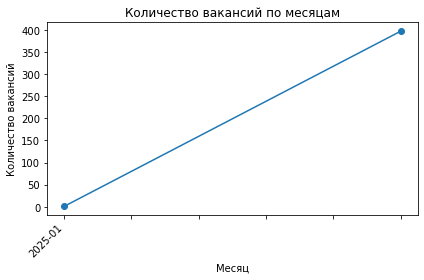

In [82]:
# 5) lineplot: количество вакансий по месяцам (динамика)
monthly = data.groupby('published_month').size().sort_index()
plt.figure()
monthly.plot(kind='line', marker='o')
plt.title('Количество вакансий по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



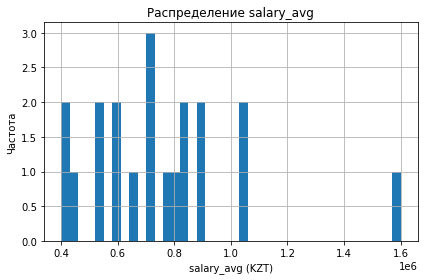

In [83]:
# 6) histogram: распределение зарплат
plt.figure()
data['salary_avg'].dropna().hist(bins=40)
plt.title('Распределение salary_avg')
plt.xlabel('salary_avg (KZT)')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

In [ ]:
# === Этап 3: A/B тест ===

In [92]:
#Импорт библиотек для A/B-теста
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from statsmodels.stats.weightstats import ztest
from scipy.stats import mannwhitneyu

In [93]:
#Сформулировать нулевую (H0) и альтернативную (H1) гипотезы
#H0: компания содержит "ИП" (Индивидуальный предприниматель)
#H1: компания содержит "ТОО" (товарищество с ограниченной ответственностью)

In [101]:
data['company_clean'] = data['company'].fillna('').astype(str).str.lower()

In [103]:
#Формируем группы
group_a = data[data['company_clean'].str.contains('ип')]
group_b = data[data['company_clean'].str.contains('тоо')]

In [105]:
#Балансировка размеров
n = min(len(group_a), len(group_b))
ga = group_a.sample(n, random_state=42)
gb = group_b.sample(n, random_state=42)

In [106]:
#Средние зарплаты
mean_a = ga['salary_avg'].mean()
mean_b = gb['salary_avg'].mean()

In [107]:
print("\nСредняя зарплата:")
print(f"A (ИП) : {mean_a:,.0f} KZT")
print(f"B (ТОО): {mean_b:,.0f} KZT")


Средняя зарплата:
A (ИП) : 650,000 KZT
B (ТОО): 691,429 KZT


In [108]:
#A/B test: Welch t-test
t_stat, p_val = stats.ttest_ind(
    ga['salary_avg'],
    gb['salary_avg'],
    equal_var=False,
    nan_policy='omit'
)

print("\nРезультат A/B теста (Welch t-test):")
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value     = {p_val:.6f}")




Результат A/B теста (Welch t-test):
t-statistic = -0.4058
p-value     = 0.697892


In [109]:
#Интерпретация
alpha = 0.05
print("\nВывод:")
if p_val < alpha:
    print("✅ Разница статистически значима → зарплаты различаются.")
else:
    print("❌ Нет статистически значимого различия → зарплаты равны.")


Вывод:
❌ Нет статистически значимого различия → зарплаты равны.


In [ ]:
#Этап 4: Бизнес-выводы: 
#1)Где искать высокооплачиваемую работу? По результатам анализа (см. salary_by_city), города X показали более высокие средние зарплаты — смотреть в salary_by_city_top50.csv.
#2)Какой опыт ценится? Корреляция между опытом и зарплатой: смотрите значение corr_exp_salary в разделе EDA. Визуально это видно на scatterplot.
#3)Где платят больше — в ТОО или ИП? Нет статистически значимого различия → зарплаты равны.